In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
seed(2)

In [91]:
df = pd.read_csv('train_preprocessed.csv', header=0)
df_test = pd.read_csv('test_preprocessed.csv', header=0)

X=df.iloc[:,1:24]
y=df.iloc[:,24:25]
X_validation_test=df_test.iloc[:,1:24]

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state=0)

#GradientBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

model = GradientBoostingClassifier(learning_rate=0.1,max_depth=10,max_features=8,n_estimators=300)
model.fit(x_train,y_train)

#validation
y_pred = model.predict(x_validation)
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))
print(confusion_matrix(y_validation,y_pred))
print(classification_report(y_validation,y_pred))

#test
y_pred_test = model.predict(x_validation_test)

#normal 0.89 0.47

C:\Users\AkeshalaMarasinghe\.conda\envs\HackStat2.0\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 1
Best features : Index(['5'], dtype='object')


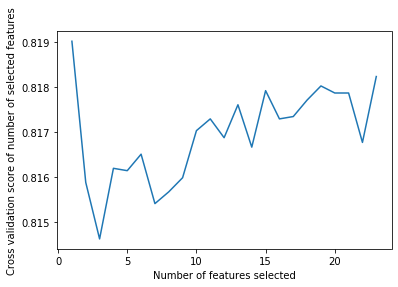

In [102]:
#Optimal number of features

from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0, max_depth=10) 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#Optimal number of features : 17
#Best features : Index(['0', '4', '5', '6', '7', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'], dtype='object')

In [74]:
df_test=pd.DataFrame({'NEXT_MONTH_DEFAULT':y_pred_test})
df_test.to_csv('Submissions/Submit3.csv',index=False)